In [5]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('factbook.db')
tabs = pd.read_sql_query("SELECT * FROM sqlite_master WHERE type='table';", conn)
tabs.head()

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [6]:
facts = pd.read_sql_query("SELECT * FROM facts LIMIT 5;", conn)
facts.head()

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [8]:
population = pd.read_sql_query("""
SELECT
    MIN(population),
    MAX(population),
    MIN(population_growth),
    MAX(population_growth)
FROM
    facts
""", conn)
population.head()

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


In [11]:
pop_min = pd.read_sql_query("""
SELECT
    id,
    name,
    population
FROM
    facts
WHERE
    population = 0
""", conn)
pop_min.head()

,id,name,population
0,250,Antarctica,0


In [12]:
pop_max = pd.read_sql_query("""
SELECT
    id,
    name,
    population
FROM
    facts
WHERE
    population = 7256490011
""", conn)
pop_max.head()

,id,name,population
0,261,World,7256490011


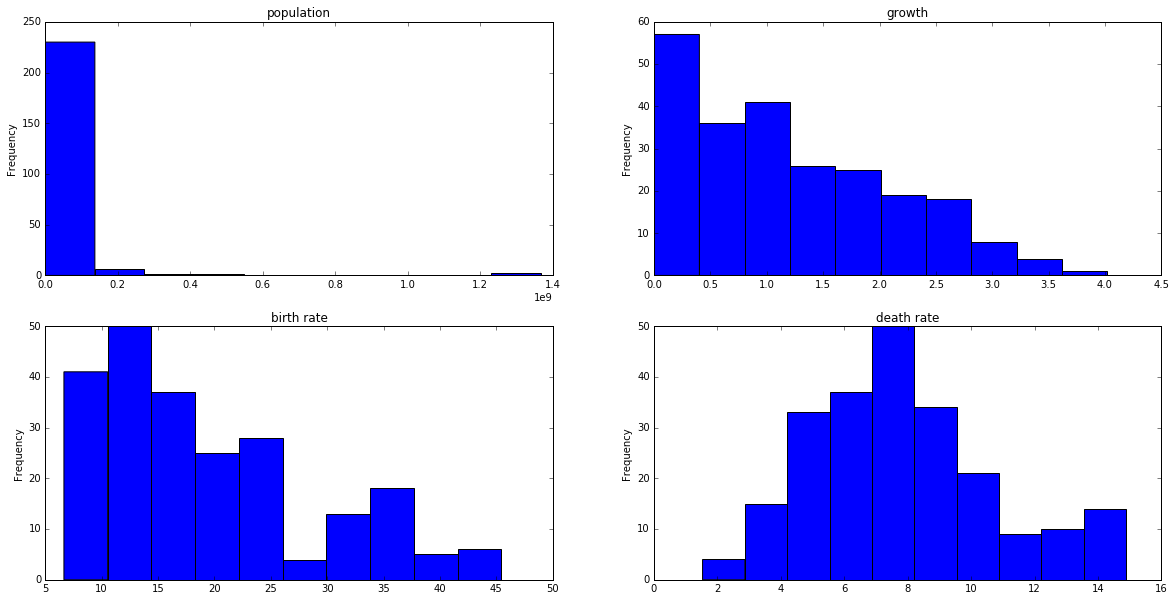

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

histdata = pd.read_sql_query("""
SELECT
    name,
    population,
    population_growth,
    birth_rate,
    death_rate
FROM
    facts
WHERE
    id not in (250, 261)
""", conn)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

histdata['population'].plot(kind='hist', ax=axes[0,0]); 
axes[0,0].set_title('population');

histdata['population_growth'].plot(kind='hist', ax=axes[0,1]); 
axes[0,1].set_title('growth');

histdata['birth_rate'].plot(kind='hist', ax=axes[1,0]); 
axes[1,0].set_title('birth rate');

histdata['death_rate'].plot(kind='hist', ax=axes[1,1]); 
axes[1,1].set_title('death rate');

- Which countries have the highest population density?
  - Population density is the ratio of population to land area. Compare your results with those from Wikipedia.
- Generate a histogram of population densities.
- Which countries have the highest ratios of water to land? Which countries have more water than land?